# Price Range Classifier NN example

## Data Processing
Start by importing the data

In [55]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('train.csv')
dataset.head(10) # show first 10 rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [56]:
# Change pandas dataframe to numpy array
X = dataset.iloc[:, :20].values # features
y = dataset.iloc[:, 20:21].values # just price_range column

Now we need to normalise the data, this is where you make the datarange of each column of the same scale. This is done to improve accuracy of the neural network.

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [58]:
# Hot encode the price_range column
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

Split data into training and testing set. This is so that we make sure we don't overfit the training data. Here we use 90% training, 10% testing.

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

## Building the Neural Network

In [60]:
# Imports
# import keras
from keras.models import Sequential
from keras.layers import Dense # Fully connected layer

# Create model
model = Sequential() # Sequential network model
model.add(Dense(16, input_dim=20, activation='relu')) # Hidden layer 1
model.add(Dense(12, activation='relu')) # Hidden layer 2
model.add(Dense(4, activation='softmax')) # Output layer

In [61]:
# Specify loss function, optimizer and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# categorical_crossentropy is used for multi-class classification
# adam is a gradient descent algorithm
# Metric is how we judge the performance of our neural network, in this case via accuracy

## Training Model

In [62]:
# Use model.fit to run the training of the model
# We can use the test data during training to see how the model is performing at each epoch
# This is called validation data, and helps us to see if the model is overfitting
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 1s 7ms/step - loss: 1.4337 - accuracy: 0.3017 - val_loss: 1.4626 - val_accuracy: 0.2850
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 1.3483 - accuracy: 0.3494 - val_loss: 1.3817 - val_accuracy: 0.3350
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 1.2857 - accuracy: 0.3939 - val_loss: 1.3187 - val_accuracy: 0.4100
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 1.2255 - accuracy: 0.4522 - val_loss: 1.2519 - val_accuracy: 0.4650
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 1.1598 - accuracy: 0.4967 - val_loss: 1.1723 - val_accuracy: 0.5450
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 1.0840 - accuracy: 0.5444 - val_loss: 1.0804 - val_accuracy: 0.5750
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.9991 - accuracy: 0.5889 - val_loss: 0.9710 - val_accuracy: 0.6500
Epoch 8/100
2

In [63]:
# Inverse the hot encoding process

y_pred = model.predict(X_test) # Predict on the test set

# Convert predictions to a label
pred = list()
for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))

# Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))

7/7 [==============================] - 0s 1ms/step


In [64]:
# Check model's performance using the test data
from sklearn.metrics import accuracy_score
a = accuracy_score(pred, test)
print("Accuracy is:", a*100, "% on the test set.")

Accuracy is: 92.0 % on the test set.


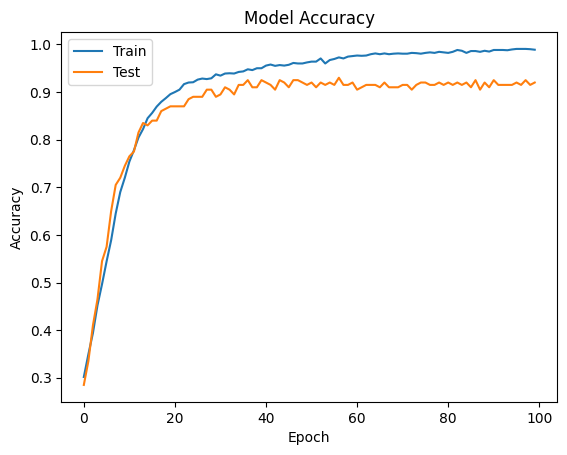

In [65]:
# Now we can plot the accuracy of the model as a function of the number of epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

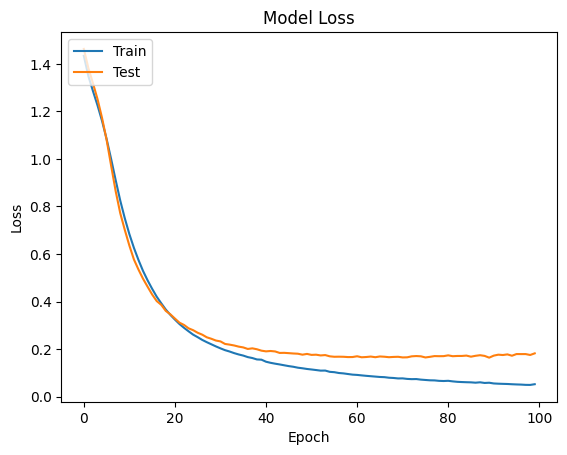

In [66]:
# and the loss of the model as a function of the number of epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()